In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# This notebook produces Supplementary Information Figure 1

In [5]:
def get_diagonals(dim):
    
    """
    Return vector of diagonals to evaluate functions over
    bands run from [1,dim]
    
    Input:
        dim (int) - size of matrix
        
    Output:
        diagonals (1d array) - vector of integers from 1 to dim
    """
    
    diagonals = np.linspace(1,dim,dim,dtype='int')
    
    return diagonals

def get_delta_Lower(diagonals, dim, mass, dx):
    
    """
    Return vector of lower bound approximations to DVR matrix
    
    Input:
        diagonals (1d array)  - array of diagonals to evaluate lower bound over
        dim (int) - size of matrix DVR matrix
        mass (float) - mass of system
        dx (float) - spacing between grid points 
        
    Output:
        delta (float) - lower bound error to DVR approximation
    """
    
    L = dim
    C = 1.0/(mass * np.square(dx))
    pf = 2 * C
    delta = pf / np.power(diagonals,3/2)
    
    return delta

def get_delta_Upper(diagonals, dim, mass, dx):
    
    """
    Return vector of lower bound approximations to DVR matrix
    
    Input:
        diagonals (1d array)  - array of diagonals to evaluate lower bound over
        dim (int) - size of matrix DVR matrix
        mass (float) - mass of system
        dx (float) - spacing between grid points 
        
    Output:
        delta (float) - upper bound error to DVR approximation
    """
    
    L = dim
    C = 1.0/(mass * np.square(dx))
    pf = 2 * np.sqrt(2) * C
    delta = pf/diagonals
    
    return delta

def sum_exact(diagonals, dim, mass, dx):
    
    """
    Return vector of error from exact summation 
    
    Input:
        diagonals (1d array)  - array of diagonals to evaluate lower bound over
        dim (int) - size of matrix DVR matrix
        mass (float) - mass of system
        dx (float) - spacing between grid points 
        
    Output
        error (float) - exact error of DVR approximation
    """ 
    
    j = 0
    C = 1.0/(mass * np.square(dx))
    L = dim
    pf = 2* np.square(C)
    
    delta = np.zeros(L)
    
    for d in diagonals:
        s=0 #sum
        for j in range(d+1,L+1):
            s += (j) * np.power((1.0/(j-1)) ,4)
        delta[d-1] = s
        
    error = np.sqrt(pf * delta)
    return error

## DVR parameters

In [3]:
n = int(9) #number of qubits
L = 30 #length of grid in a.u.
mass = 1 #mass of system in a.u.
dx = 1 #grid spacing in a.u.
dim = np.power(2,n) #dimension of DVR matrix
diagonals = get_diagonals(dim) #x axsis of plot


delta_exact = sum_exact(diagonals,dim,mass,dx)
norm = delta_exact[0]
delta_exact = sum_exact(diagonals,dim,mass,dx)/norm
delta_Lower = get_delta_Lower(diagonals,dim,mass,dx)/norm
delta_Upper = get_delta_Upper(diagonals,dim,mass,dx)/norm

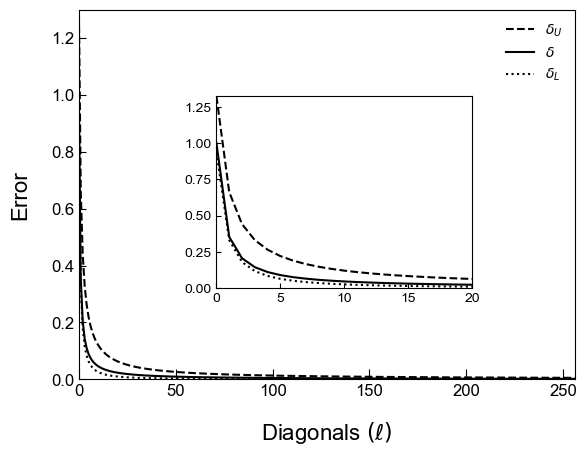

In [4]:
# Specify the font name
sns.set_palette("colorblind")
matplotlib.rc('font',family='Arial')

plt.plot(delta_Upper, color='black', linestyle='--', label=r"$\delta_U$")
plt.plot(delta_exact, color='black', label=r"$\delta$")
plt.plot(delta_Lower, color='black', linestyle=':', label=r"$\delta_L$")

plt.xlabel('Diagonals $(\ell)$',fontsize=16, fontname='Arial',labelpad=15,fontweight='light')
plt.ylabel('Error',fontsize=16, fontname='Arial',labelpad=15,fontweight='light')
plt.legend(frameon=False)

plt.xlim(0,dim/2)  # Set the x-axis limit to start from 0
plt.ylim(0,1.3)

# Set the tick parameters
plt.tick_params(axis='both', direction='in',labelsize=12)
plt.tick_params(axis='x', length=7)
plt.tick_params(axis='y', length=5)

# Inset subplot
axins = plt.axes([0.34, 0.3, 0.4, 0.4])  # Position: [left, bottom, width, height]
axins.plot(delta_Upper[:21], color='black', linestyle='--')
axins.plot(delta_exact[:21], color='black')
axins.plot(delta_Lower[:21], color='black', linestyle=':')
axins.set_xlim(0, 20)
axins.set_ylim(0, max(delta_Upper[:21]))
axins.tick_params(axis='both', direction ='in')
axins.tick_params(axis='x')

plt.savefig('error_plots.png', dpi=300,bbox_inches='tight')
plt.show()